In [41]:
import numpy as np
import pandas as pd
from itertools import product
import csv
import numpy as np
 
start_value1= 5e-06
end_value1 = 7e-04

# particle_diameter_1 = 1e-4
# particle_diameter_2 = 3e-7

start_value2 = 2e-7
end_value2 = 9e-7

column_header =['particle_diameter_1', 'particle_diameter_2']

array1 = np.linspace(start_value1, end_value1, 20)
array2 = np.linspace(start_value2, end_value2, 20)

combinations = list(product(array1, array2))
 
# Create a DataFrame using pandas
df = pd.DataFrame(combinations, columns=column_header)

# Save the DataFrame to a CSV file
csv_file_path = 'combinations.csv'
df.to_csv(csv_file_path, index=False)

print(df)



     particle_diameter_1  particle_diameter_2
0               0.000005         2.000000e-07
1               0.000005         2.368421e-07
2               0.000005         2.736842e-07
3               0.000005         3.105263e-07
4               0.000005         3.473684e-07
..                   ...                  ...
395             0.000700         7.526316e-07
396             0.000700         7.894737e-07
397             0.000700         8.263158e-07
398             0.000700         8.631579e-07
399             0.000700         9.000000e-07

[400 rows x 2 columns]


In [42]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('TT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist() 

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in)
md_df = md_df.T
md_df *= 1e-6
md_df = md_df.drop(503)
md_df = md_df.drop(502)
md_df = md_df.drop(501)

# Define the name of the column to be used as the new index
new_index_column = t_header

# Set the new index using the specified column
md_df.set_index(new_index_column, inplace=True)
print('Modeling Results')
md_df


ValueError: need at least one array to stack

(0.0, 5.0)

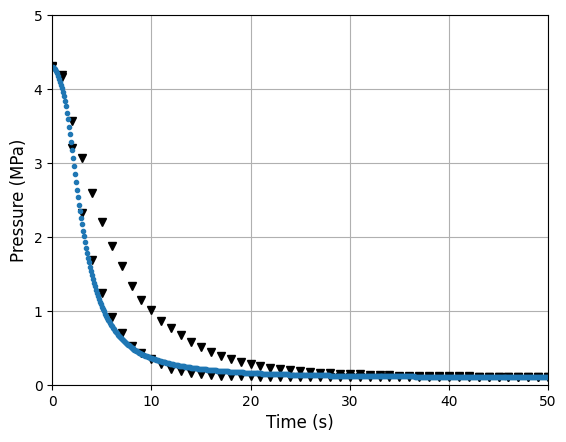

In [66]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Plot all pressure decays
# ax = md_df.plot(colormap='tab20', legend=False)
prediction = pd.read_csv('model_pellets_out.csv')
plt.plot(data20['time'], data20['TT1_600_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['TT1_600_2']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(prediction['time'], prediction['inlet-p']/1e6, linestyle = '', marker = '.')
# ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 5)



In [ ]:


# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]): 
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_600_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE 1: ' + str(minimum_ARMSE))
min_index_1 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

NameError: name 'md_df' is not defined

In [ ]:
# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_600_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE 1: ' + str(minimum_ARMSE))
min_index_2 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_2]
print(selected_row)
print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

Minimum ARMSE 1: 0.0660004733762698
particle_diameter_1    1.147368e-04
particle_diameter_2    3.105263e-07
Name: 63, dtype: float64
particle_diameter_1 =  0.0001147368421052
particle_diameter_2 =  3.105263157894737e-07


(0.0, 5.0)

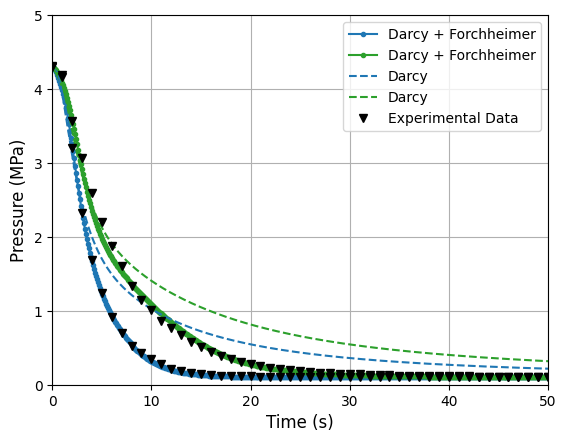

In [ ]:
# Plot all pressure decays
darcy_1 = pd.read_csv('model_pellets_1.csv')
darcy_2 = pd.read_csv('model_pellets_2.csv')
md_df[min_index_1].plot(marker = '.', color = 'C0', label = 'Darcy + Forchheimer' )
md_df[min_index_2].plot(marker = '.', color = 'C2', label = 'Darcy + Forchheimer')
plt.plot(darcy_1['time'], darcy_1['inlet-p']/1e6, color = 'C0', linestyle = '--', label = 'Darcy')
plt.plot(darcy_2['time'], darcy_2['inlet-p']/1e6, color = 'C2', linestyle = '--', label = 'Darcy')
plt.plot(data20['time'], data20['TT1_600_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['TT1_600_2']/1e6, color = 'k', marker = 'v', linestyle = '', label ='Experimental Data')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.legend()
plt.xlim(0, 50)
plt.ylim(0, 5)

